In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
import tensorflow as tf
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
from PIL import Image
from six.moves import range


# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

import pandas as pd

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
train_folder = "../input/ekush-hand-written-characters/Train/Train"
test_folder = "../input/ekush-hand-written-characters/Test/Test"
dimensions = (28, 28)

In [3]:
dimensions[0]

28

In [4]:
classes = [os.path.join(train_folder, d) for d in sorted(os.listdir(train_folder))]

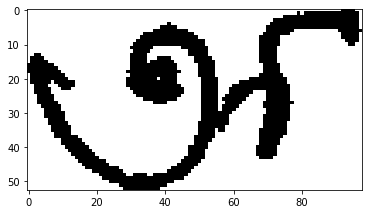

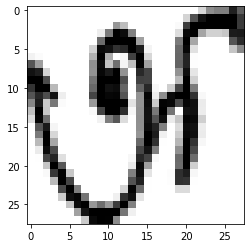

In [5]:
im = Image.open('../input/ekush-hand-written-characters/Train/Train/172/bcc000000.bmp')
plt.figure()
plt.imshow(im)
plt.show()
im = im.resize(dimensions)
plt.figure()
plt.imshow(im)
plt.show()

In [6]:
ima = np.array(im)
ima.shape

(28, 28, 3)

In [7]:
np.unique(ima)

array([  0,   1,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        15,  16,  17,  18,  19,  25,  26,  28,  29,  30,  31,  32,  34,
        35,  36,  39,  40,  41,  43,  46,  47,  48,  49,  50,  51,  54,
        57,  58,  60,  61,  65,  66,  67,  68,  69,  70,  73,  74,  76,
        77,  78,  81,  83,  84,  85,  86,  87,  93,  99, 101, 103, 105,
       106, 108, 110, 111, 112, 116, 117, 120, 121, 122, 123, 126, 127,
       128, 129, 134, 137, 139, 141, 143, 144, 145, 146, 147, 148, 149,
       150, 151, 153, 158, 159, 160, 161, 162, 164, 167, 172, 176, 182,
       185, 189, 191, 192, 196, 197, 199, 200, 202, 203, 204, 206, 207,
       208, 209, 212, 214, 215, 219, 220, 221, 223, 225, 227, 228, 230,
       234, 235, 236, 237, 238, 240, 242, 244, 245, 246, 247, 248, 249,
       250, 251, 252, 253, 254, 255], dtype=uint8)

In [8]:
imi = np.where(ima<127, 1, 0)

In [9]:
imr = imi.reshape(28*28*3, )
np.unique(imr)

array([0, 1])

In [10]:
imtem = imr * 255
imtem = imtem.reshape(28,28,3)

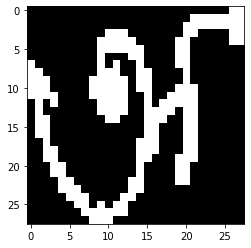

In [11]:
im2 = Image.fromarray(imtem.astype(np.uint8))
plt.figure()
plt.imshow(im2)
plt.show()

In [12]:
imc = np.insert(imr, 0,int('12'))

In [13]:
cols = ['class']
pixels = [i for i in range(0, 28*28*3)]
cols.extend(pixels)

In [14]:
df = pd.DataFrame(columns=cols)
df.loc[len(df)] = imc
df.head()

,class,0,1,2,3,4,5,6,7,8,...,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351
0,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
ima[ima < 127] = 0
ima[ima >= 127] = 255

In [16]:
np.unique(ima)

array([  0, 255], dtype=uint8)

In [17]:
im2 = Image.fromarray(ima)

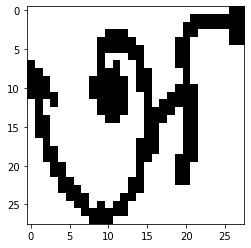

In [18]:
plt.figure()
plt.imshow(im2)
plt.show()

In [19]:
imi = np.where(ima==255, 0, 255)

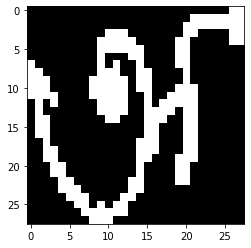

In [20]:
im2 = Image.fromarray(imi.astype(np.uint8))
plt.figure()
plt.imshow(im2)
plt.show()

In [21]:
cols = ['class']
pixels = [i for i in range(0, 28*28*3)]
cols.extend(pixels)
dataFrame = pd.DataFrame(columns=cols)
length = 0

In [22]:
def convert_to_csv(folder):
    cols = ['class']
    pixels = [i for i in range(0, dimensions[0] * dimensions[1] * 3)]
    cols.extend(pixels)
    dataFrame = pd.DataFrame(columns=cols)
    length = 0
    total_images = 0
    
    classes = [os.path.join(folder, d) for d in sorted(os.listdir(folder))]
    
    for class_i in classes:
        if os.path.isdir(class_i):
            images = [os.path.join(class_i, i) for i in sorted(os.listdir(class_i)) if i != '.DS_Store']
            for image in images:
                total_images += 1

    for class_i in classes:
        if os.path.isdir(class_i):
            images = [os.path.join(class_i, i) for i in sorted(os.listdir(class_i)) if i != '.DS_Store']
            for image in images:
                if image[-3:] == 'bmp':
                    print('Precessed {} / {} image files'.format(length, total_images), end="\r", flush=True)
                    im = Image.open(image)
                    im_resized = im.resize(dimensions)
                    im_array = np.array(im_resized)
                    imi = np.where(im_array<127, 1, 0)
                    imr = imi.reshape(dimensions[0] * dimensions[1] * 3, )
                    im_with_class = np.insert(imr, 0,int(class_i[-3:]))
                    dataFrame.loc[length] = im_with_class
                    length += 1
    
    print('Processing completed')
                
    return dataFrame

In [23]:
tdf = convert_to_csv(train_folder)
tdf.head()

Processing completed


,class,0,1,2,3,4,5,6,7,8,...,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351
0,172,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,172,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,172,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
3,172,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
4,172,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df.to_csv('train_images.csv')

In [25]:
testdf = convert_to_csv(test_folder)
testdf.head()

Processing completed


,class,0,1,2,3,4,5,6,7,8,...,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351
0,172,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,172,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
2,172,0,0,0,1,1,1,0,0,0,...,0,1,1,1,0,0,0,0,0,0
3,172,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,172,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
testdf.to_csv('test_images.csv')

In [27]:
max_angle = 15

def rotate_img(image, angle, color, filter = Image.NEAREST):
    
    if image.mode == "P" or filter == Image.NEAREST:
        matte = Image.new("1", image.size, 1) # mask
    else:
        matte = Image.new("L", image.size, 255) # true matte
    bg = Image.new(image.mode, image.size, color)
    bg.paste(
        image.rotate(angle, filter), 
        matte.rotate(angle, filter)
    )
    return bg

def make_greyscale_white_bg(im, r, b, g):

    im = im.convert('RGBA')   # Convert to RGBA
    
    
    data = np.array(im)   # "data" is a height x width x 4 numpy array
    red, green, blue, alpha = data.T # Temporarily unpack the bands for readability

    # Replace grey with white... (leaves alpha values alone...)
    grey_areas = (red == r) & (blue == b) & (green == g)
    data[..., :-1][grey_areas.T] = (255, 255, 255) # Transpose back needed
    
    im2 = Image.fromarray(data)
    im2 = im2.convert('L')   # convert to greyscale image
    
    
    
    #im2.show()
    
    return im2

def random_rotate(img, copies, curr_filename, path):
    
    c_color = img.getpixel((0,0))
    
    for i in range(copies):
        
        new_im = rotate_img(img, np.random.randint((0 - max_angle), max_angle), c_color)
#         new_im.save(os.path.join(path, "bcc" + str(curr_filename).zfill(6) + ".bmp"))
        
        curr_filename = curr_filename + 1
        
    
    

def augment_by_rotations(folder, prev_cnt):
    
    classes = [os.path.join(folder, d) for d in sorted(os.listdir(folder))]  # get list of all sub-folders in folder
    
    for path_to_folder in classes: 
    
        if os.path.isdir(path_to_folder):
            images = [os.path.join(path_to_folder, i) for i in sorted(os.listdir(path_to_folder)) if i != '.DS_Store']
            filename = prev_cnt
            for image in images:

                im = Image.open(image)

                random_rotate(im, 4, filename, path_to_folder)
                filename = filename + 4

            print("Finished augmenting " + path_to_folder)
        
        

def invert_colors(im):
    
    im = im.convert('RGBA')   # Convert to RGBA  
    data = np.array(im)   # "data" is a height x width x 4 numpy array
    red, green, blue, alpha = data.T # Temporarily unpack the bands for readability
    

    # Replace grey with white... (leaves alpha values alone...)
    black_areas = (red == 0) & (blue == 0) & (green == 0)
    data[..., :-1][black_areas.T] = (255, 0, 0) # Transpose back needed
    
    white_areas = (red == 255) & (blue == 255) & (green == 255)
    data[..., :-1][white_areas.T] = (0, 0, 0) # Transpose back needed
    
    red_areas = (red == 255) & (blue == 0) & (green == 0)
    data[..., :-1][red_areas.T] = (255, 255, 255) # Transpose back needed

    im2 = Image.fromarray(data)
    im2 = im2.convert('L')   # convert to greyscale image
    
    
    
    #im2.show()
    
    return im2
    
    

# def test_rotations():
        
#     img = Image.open("Train/172/bcc000002.bmp")
    
#     #img = img.rotate(30)
    
#     img = img.resize(dimensions)
    
    
    
    rot = make_greyscale_white_bg(img, 127, 127, 127)
    
    rot = invert_colors(rot)
    c_color = rot.getpixel((0, 0))
    rot = rotate_img(rot, 10, c_color)
    
    w, h = rot.size
    rot.show()
    
    
    
def process_images(folder):
    
    classes = [os.path.join(folder, d) for d in sorted(os.listdir(folder))]  # get list of all sub-folders in folder
    img_cnt = 0
    print(classes)
    for class_x in classes:
        
        if os.path.isdir(class_x):
            
            # get paths to all the images in this folder
            images = [os.path.join(class_x, i) for i in sorted(os.listdir(class_x)) if i != '.DS_Store']
            m = 0
            
            for image in images:
                if m > 59:
                    break;
                img_cnt = img_cnt + 1
                
                if(img_cnt % 1000 == 0): 
                    print("Processed %s images" % str(img_cnt))
                
                im = Image.open(image)
                print(image)
#                 plt.figure()
#                 plt.imshow(im)
#                 plt.show()
                im = im.resize(dimensions)   # resize image according to dimensions set
                
#                 im = make_greyscale_white_bg(im, 127, 127, 127) # turn grey background (if any) to white, and
                                                                  # convert into greyscale image with 1 channel
                    
#                 im = invert_colors(im)
#                 im.save(image)   # overwrite previous image file with new image
#                 plt.figure()
#                 plt.imshow(im)
#                 plt.show()
                
                m = m + 1
                
    print("Finished processing images, images found = ")
    print(img_cnt)
                
process_images(test_folder)
process_images(train_folder)

#augment_by_rotations("Train/172")
augment_by_rotations(train_folder, 240)
    

['../input/ekush-hand-written-characters/Test/Test/172', '../input/ekush-hand-written-characters/Test/Test/173', '../input/ekush-hand-written-characters/Test/Test/174', '../input/ekush-hand-written-characters/Test/Test/175', '../input/ekush-hand-written-characters/Test/Test/176', '../input/ekush-hand-written-characters/Test/Test/177', '../input/ekush-hand-written-characters/Test/Test/178', '../input/ekush-hand-written-characters/Test/Test/179', '../input/ekush-hand-written-characters/Test/Test/180', '../input/ekush-hand-written-characters/Test/Test/181', '../input/ekush-hand-written-characters/Test/Test/182', '../input/ekush-hand-written-characters/Test/Test/183', '../input/ekush-hand-written-characters/Test/Test/184', '../input/ekush-hand-written-characters/Test/Test/185', '../input/ekush-hand-written-characters/Test/Test/186', '../input/ekush-hand-written-characters/Test/Test/187', '../input/ekush-hand-written-characters/Test/Test/188', '../input/ekush-hand-written-characters/Test/Te